PRAKTIKUM 2: KLASIFIKASI DATA IRIS DENGAN KERAS

Dataset Info:
Jumlah sampel: 150
Jumlah fitur: 4
Jumlah kelas: 3
Nama fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nama kelas: ['setosa' 'versicolor' 'virginica']

Data Training: (120, 4)
Data Testing: (30, 4)

KONFIGURASI AWAL: [10, 8] Hidden Neurons dengan ReLU


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)


Training model...

Hasil Evaluasi:
Loss: 0.7035
Akurasi: 0.9667 (96.67%)

TUGAS 2: VARIASI JUMLAH NEURON HIDDEN LAYER

--- Testing: Original [10, 8] ---
Loss: 1.0260, Akurasi: 0.2333 (23.33%)

--- Testing: Small [5, 3] ---
Loss: 0.6313, Akurasi: 0.6333 (63.33%)

--- Testing: Medium [15, 10] ---
Loss: 0.1059, Akurasi: 1.0000 (100.00%)

--- Testing: Large [20, 15] ---
Loss: 0.1343, Akurasi: 0.9667 (96.67%)

--- Testing: Deep [12, 10, 8] ---
Loss: 0.1388, Akurasi: 0.9333 (93.33%)

PERBANDINGAN HASIL TUGAS 2
     Konfigurasi   Loss Akurasi Akurasi (%)
Original [10, 8] 1.0260  0.2333      23.33%
    Small [5, 3] 0.6313  0.6333      63.33%
 Medium [15, 10] 0.1059  1.0000     100.00%
  Large [20, 15] 0.1343  0.9667      96.67%
Deep [12, 10, 8] 0.1388  0.9333      93.33%

TUGAS 3: PERBANDINGAN SIGMOID VS RELU

--- Testing Activation: SIGMOID ---


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.5782, Akurasi: 0.9667 (96.67%)

--- Testing Activation: RELU ---
Loss: 0.1473, Akurasi: 1.0000 (100.00%)

--- Testing Activation: TANH ---
Loss: 0.2005, Akurasi: 1.0000 (100.00%)

PERBANDINGAN HASIL TUGAS 3
Fungsi Aktivasi   Loss Akurasi Akurasi (%)
        SIGMOID 0.5782  0.9667      96.67%
           RELU 0.1473  1.0000     100.00%
           TANH 0.2005  1.0000     100.00%

VISUALISASI HASIL


C:\Users\USER\AppData\Local\Temp\ipykernel_22264\3957535701.py:272: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


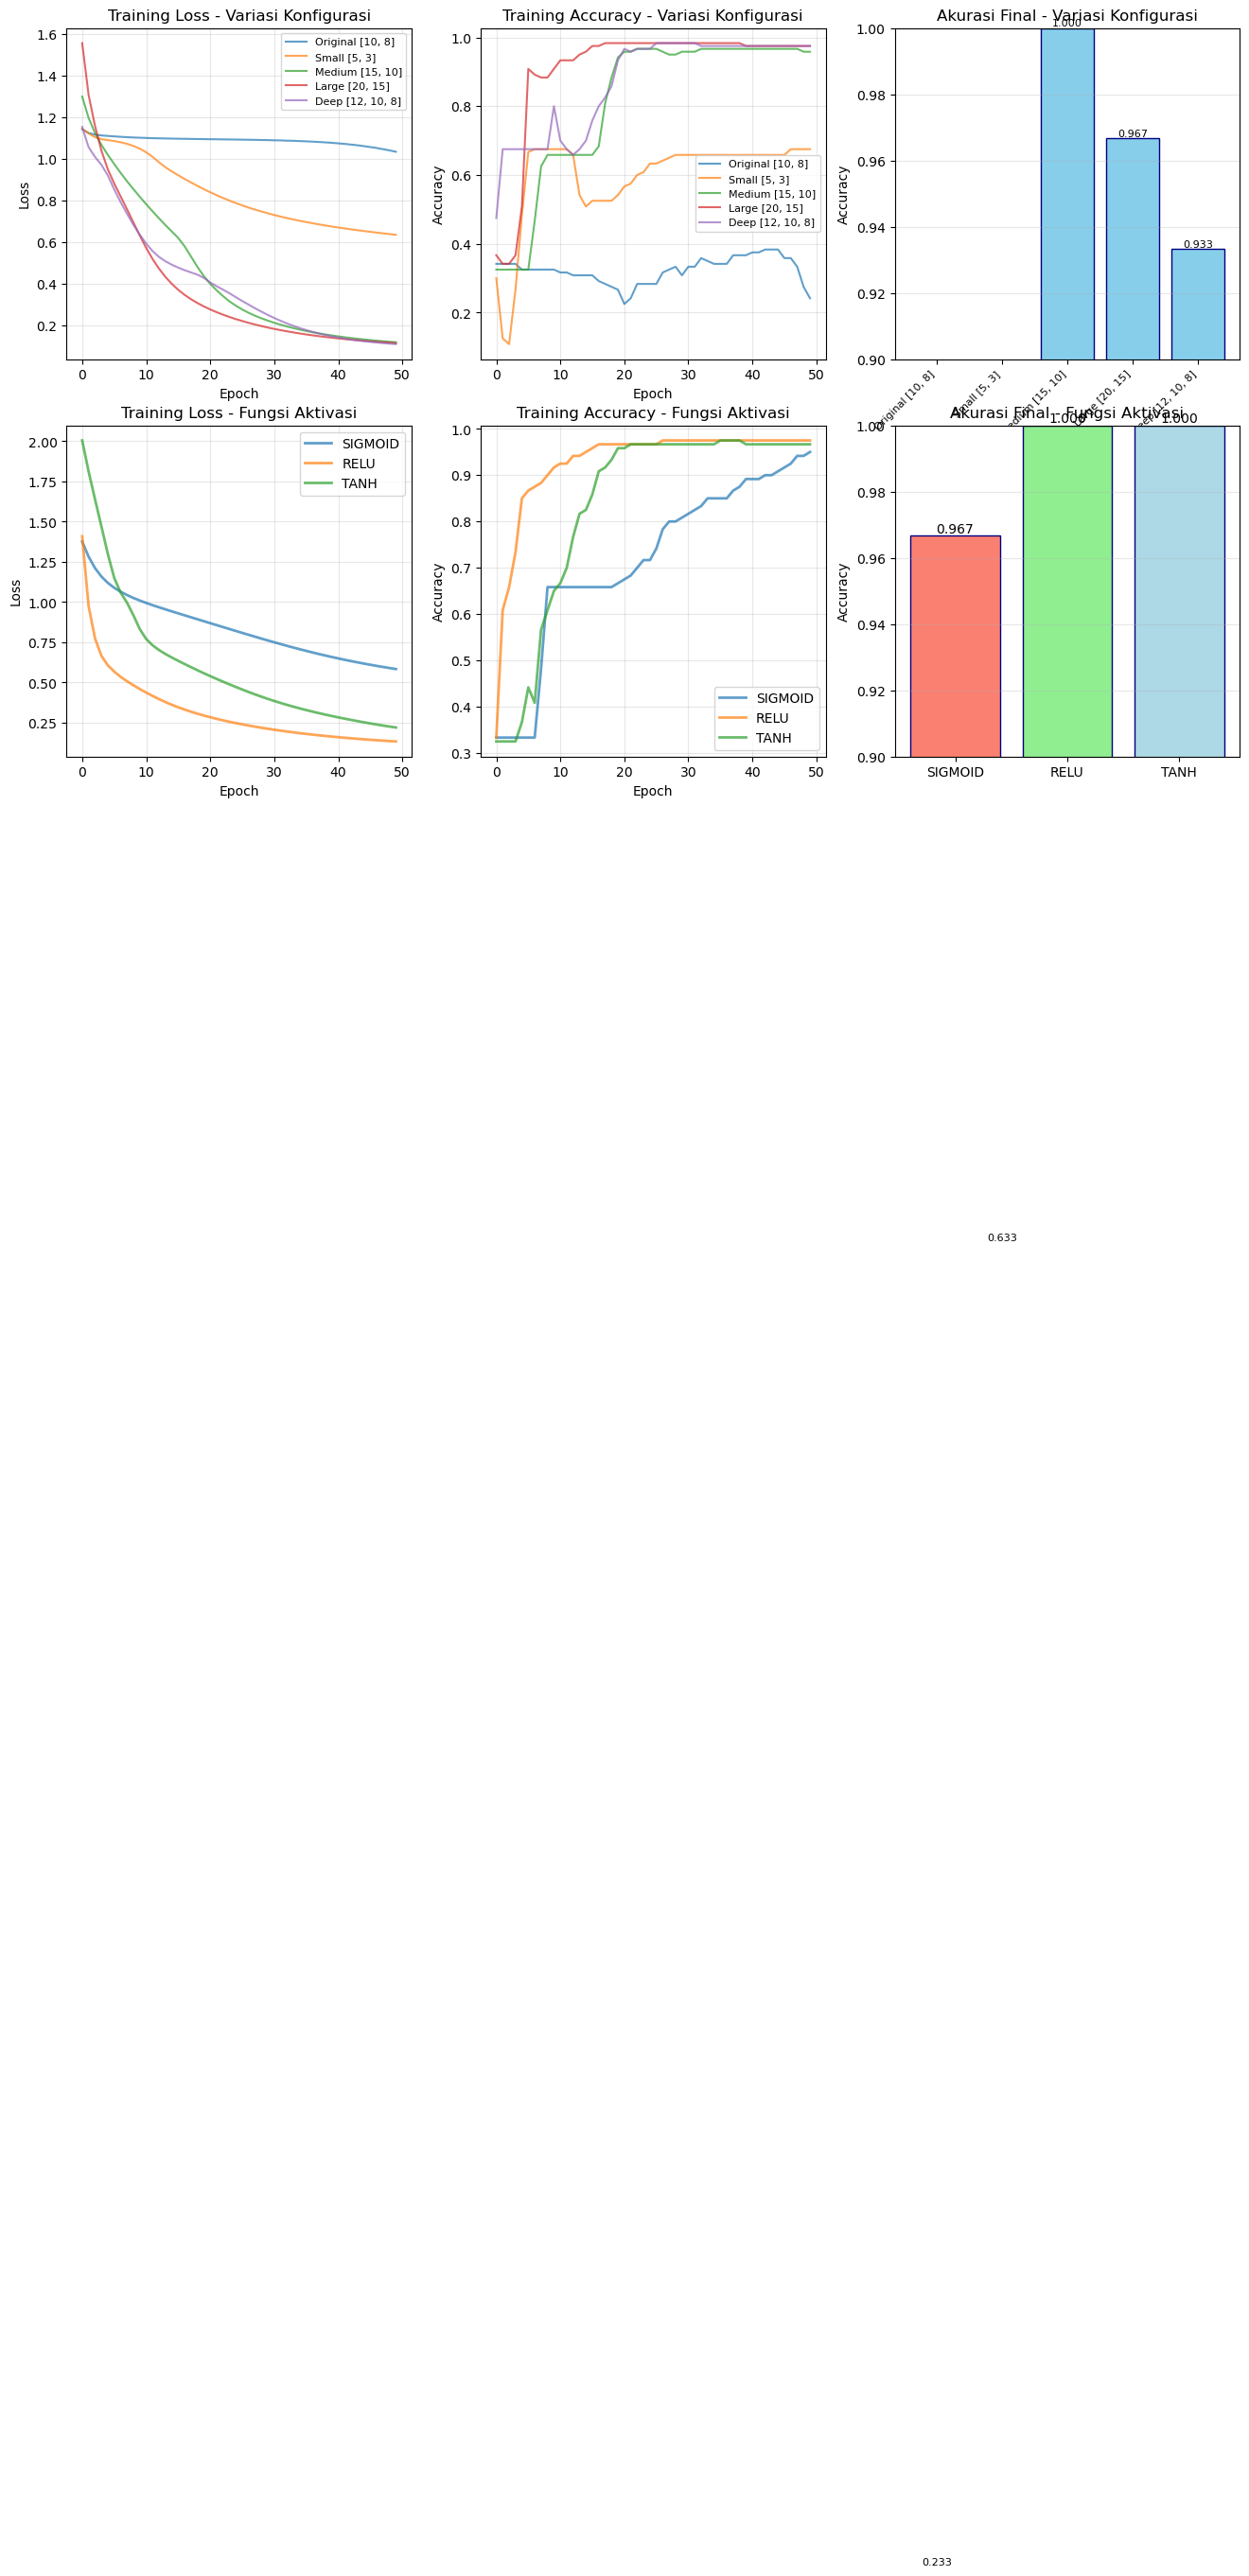


KESIMPULAN

📊 TUGAS 2 - Variasi Hidden Layer:
   • Konfigurasi terbaik: Medium [15, 10]
   • Akurasi tertinggi: 1.0000 (100.00%)
   • Kesimpulan: Menambah neuron tidak selalu meningkatkan akurasi.
     Model yang terlalu kompleks bisa overfit pada dataset kecil.

🎯 TUGAS 3 - Fungsi Aktivasi:
   • Fungsi aktivasi terbaik: RELU
   • Akurasi tertinggi: 1.0000 (100.00%)
   • ReLU: Cepat konvergen, menghindari vanishing gradient
   • Sigmoid: Konvergen lebih lambat, output bounded [0,1]
   • Tanh: Similar dengan sigmoid, output bounded [-1,1]

💡 Rekomendasi:
   • Untuk dataset kecil seperti Iris, model sederhana sudah cukup
   • ReLU umumnya pilihan terbaik untuk hidden layers
   • Softmax tetap digunakan untuk output layer klasifikasi multi-class


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("=" * 70)
print("PRAKTIKUM 2: KLASIFIKASI DATA IRIS DENGAN KERAS")
print("=" * 70)

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

print(f"\nDataset Info:")
print(f"Jumlah sampel: {X.shape[0]}")
print(f"Jumlah fitur: {X.shape[1]}")
print(f"Jumlah kelas: {len(np.unique(y))}")
print(f"Nama fitur: {iris.feature_names}")
print(f"Nama kelas: {iris.target_names}")

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData Training: {X_train.shape}")
print(f"Data Testing: {X_test.shape}")


# ========== KONFIGURASI AWAL ==========
print("\n" + "=" * 70)
print("KONFIGURASI AWAL: [10, 8] Hidden Neurons dengan ReLU")
print("=" * 70)

model_original = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_original.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\nModel Summary:")
model_original.summary()

print("\nTraining model...")
history_original = model_original.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=8, 
    validation_data=(X_test, y_test),
    verbose=0
)

loss_original, acc_original = model_original.evaluate(X_test, y_test, verbose=0)
print(f"\nHasil Evaluasi:")
print(f"Loss: {loss_original:.4f}")
print(f"Akurasi: {acc_original:.4f} ({acc_original*100:.2f}%)")


# ========== TUGAS 2: VARIASI HIDDEN LAYERS ==========
print("\n" + "=" * 70)
print("TUGAS 2: VARIASI JUMLAH NEURON HIDDEN LAYER")
print("=" * 70)

# Konfigurasi yang akan diuji
configs = [
    {'name': 'Original [10, 8]', 'layers': [10, 8]},
    {'name': 'Small [5, 3]', 'layers': [5, 3]},
    {'name': 'Medium [15, 10]', 'layers': [15, 10]},
    {'name': 'Large [20, 15]', 'layers': [20, 15]},
    {'name': 'Deep [12, 10, 8]', 'layers': [12, 10, 8]},
]

results_config = []

for config in configs:
    print(f"\n--- Testing: {config['name']} ---")
    
    # Reset seed
    tf.random.set_seed(42)
    
    # Build model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(config['layers'][0], activation='relu', input_shape=(4,)))
    
    for neurons in config['layers'][1:]:
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    # Compile
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=8,
        validation_data=(X_test, y_test),
        verbose=0
    )
    
    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    results_config.append({
        'Konfigurasi': config['name'],
        'Loss': loss,
        'Akurasi': acc,
        'History': history
    })
    
    print(f"Loss: {loss:.4f}, Akurasi: {acc:.4f} ({acc*100:.2f}%)")

# Tampilkan tabel perbandingan
print("\n" + "=" * 70)
print("PERBANDINGAN HASIL TUGAS 2")
print("=" * 70)
df_config = pd.DataFrame([{
    'Konfigurasi': r['Konfigurasi'],
    'Loss': f"{r['Loss']:.4f}",
    'Akurasi': f"{r['Akurasi']:.4f}",
    'Akurasi (%)': f"{r['Akurasi']*100:.2f}%"
} for r in results_config])
print(df_config.to_string(index=False))


# ========== TUGAS 3: SIGMOID VS RELU ==========
print("\n" + "=" * 70)
print("TUGAS 3: PERBANDINGAN SIGMOID VS RELU")
print("=" * 70)

activation_functions = ['sigmoid', 'relu', 'tanh']
results_activation = []

for activation in activation_functions:
    print(f"\n--- Testing Activation: {activation.upper()} ---")
    
    # Reset seed
    tf.random.set_seed(42)
    
    # Build model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation=activation, input_shape=(4,)),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=8,
        validation_data=(X_test, y_test),
        verbose=0
    )
    
    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    results_activation.append({
        'Aktivasi': activation.upper(),
        'Loss': loss,
        'Akurasi': acc,
        'History': history
    })
    
    print(f"Loss: {loss:.4f}, Akurasi: {acc:.4f} ({acc*100:.2f}%)")

# Tampilkan tabel perbandingan
print("\n" + "=" * 70)
print("PERBANDINGAN HASIL TUGAS 3")
print("=" * 70)
df_activation = pd.DataFrame([{
    'Fungsi Aktivasi': r['Aktivasi'],
    'Loss': f"{r['Loss']:.4f}",
    'Akurasi': f"{r['Akurasi']:.4f}",
    'Akurasi (%)': f"{r['Akurasi']*100:.2f}%"
} for r in results_activation])
print(df_activation.to_string(index=False))


# ========== VISUALISASI ==========
print("\n" + "=" * 70)
print("VISUALISASI HASIL")
print("=" * 70)

fig = plt.figure(figsize=(16, 10))

# Plot 1: Perbandingan Loss - Konfigurasi
ax1 = plt.subplot(2, 3, 1)
for result in results_config:
    plt.plot(result['History'].history['loss'], label=result['Konfigurasi'], alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss - Variasi Konfigurasi')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# Plot 2: Perbandingan Accuracy - Konfigurasi
ax2 = plt.subplot(2, 3, 2)
for result in results_config:
    plt.plot(result['History'].history['accuracy'], label=result['Konfigurasi'], alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy - Variasi Konfigurasi')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

# Plot 3: Bar Chart Akurasi Final - Konfigurasi
ax3 = plt.subplot(2, 3, 3)
configs_names = [r['Konfigurasi'] for r in results_config]
configs_acc = [r['Akurasi'] for r in results_config]
bars = plt.bar(range(len(configs_names)), configs_acc, color='skyblue', edgecolor='navy')
plt.xticks(range(len(configs_names)), configs_names, rotation=45, ha='right', fontsize=8)
plt.ylabel('Accuracy')
plt.title('Akurasi Final - Variasi Konfigurasi')
plt.ylim([0.9, 1.0])
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{configs_acc[i]:.3f}', ha='center', va='bottom', fontsize=8)
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Perbandingan Loss - Fungsi Aktivasi
ax4 = plt.subplot(2, 3, 4)
for result in results_activation:
    plt.plot(result['History'].history['loss'], label=result['Aktivasi'], alpha=0.7, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss - Fungsi Aktivasi')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Perbandingan Accuracy - Fungsi Aktivasi
ax5 = plt.subplot(2, 3, 5)
for result in results_activation:
    plt.plot(result['History'].history['accuracy'], label=result['Aktivasi'], alpha=0.7, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy - Fungsi Aktivasi')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Bar Chart Akurasi Final - Fungsi Aktivasi
ax6 = plt.subplot(2, 3, 6)
act_names = [r['Aktivasi'] for r in results_activation]
act_acc = [r['Akurasi'] for r in results_activation]
bars = plt.bar(act_names, act_acc, color=['salmon', 'lightgreen', 'lightblue'], edgecolor='navy')
plt.ylabel('Accuracy')
plt.title('Akurasi Final - Fungsi Aktivasi')
plt.ylim([0.9, 1.0])
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{act_acc[i]:.3f}', ha='center', va='bottom')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


# ========== KESIMPULAN ==========
print("\n" + "=" * 70)
print("KESIMPULAN")
print("=" * 70)

print("\n📊 TUGAS 2 - Variasi Hidden Layer:")
best_config = max(results_config, key=lambda x: x['Akurasi'])
print(f"   • Konfigurasi terbaik: {best_config['Konfigurasi']}")
print(f"   • Akurasi tertinggi: {best_config['Akurasi']:.4f} ({best_config['Akurasi']*100:.2f}%)")
print(f"   • Kesimpulan: Menambah neuron tidak selalu meningkatkan akurasi.")
print(f"     Model yang terlalu kompleks bisa overfit pada dataset kecil.")

print("\n🎯 TUGAS 3 - Fungsi Aktivasi:")
best_activation = max(results_activation, key=lambda x: x['Akurasi'])
print(f"   • Fungsi aktivasi terbaik: {best_activation['Aktivasi']}")
print(f"   • Akurasi tertinggi: {best_activation['Akurasi']:.4f} ({best_activation['Akurasi']*100:.2f}%)")
print(f"   • ReLU: Cepat konvergen, menghindari vanishing gradient")
print(f"   • Sigmoid: Konvergen lebih lambat, output bounded [0,1]")
print(f"   • Tanh: Similar dengan sigmoid, output bounded [-1,1]")

print("\n💡 Rekomendasi:")
print("   • Untuk dataset kecil seperti Iris, model sederhana sudah cukup")
print("   • ReLU umumnya pilihan terbaik untuk hidden layers")
print("   • Softmax tetap digunakan untuk output layer klasifikasi multi-class")
print("=" * 70)